In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from warnings import filterwarnings
from sklearn import tree
filterwarnings('ignore')

In [59]:
df = pd.read_csv('data/cell_samples.csv', header=None)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2


In [60]:
y = df["Class"]
X = df.drop(columns="Class")

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [62]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9658536585365853

In [63]:
#analiza važnosti značajki
importance = model.feature_importances_
importance

array([0.05987541, 0.69388953, 0.02376922, 0.01688139, 0.        ,
       0.17583443, 0.02381856, 0.        , 0.00593146])

In [64]:
y_scores = model.predict(x_test)
y_scores = np.where(y_scores=='2', 0, y_scores)
y_scores = np.where(y_scores=='4', 1, y_scores)

y_test = y_test.replace(['2','4'],[0,1])

y_scores = y_scores.astype(int)
y_test = y_test.astype(int)

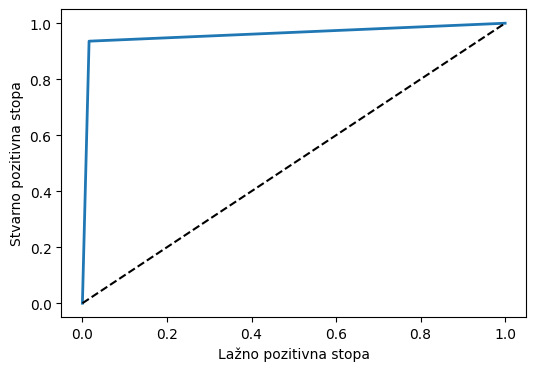

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 10

plt.xlabel('Lažno pozitivna stopa')

plt.ylabel('Stvarno pozitivna stopa')

plt.show()

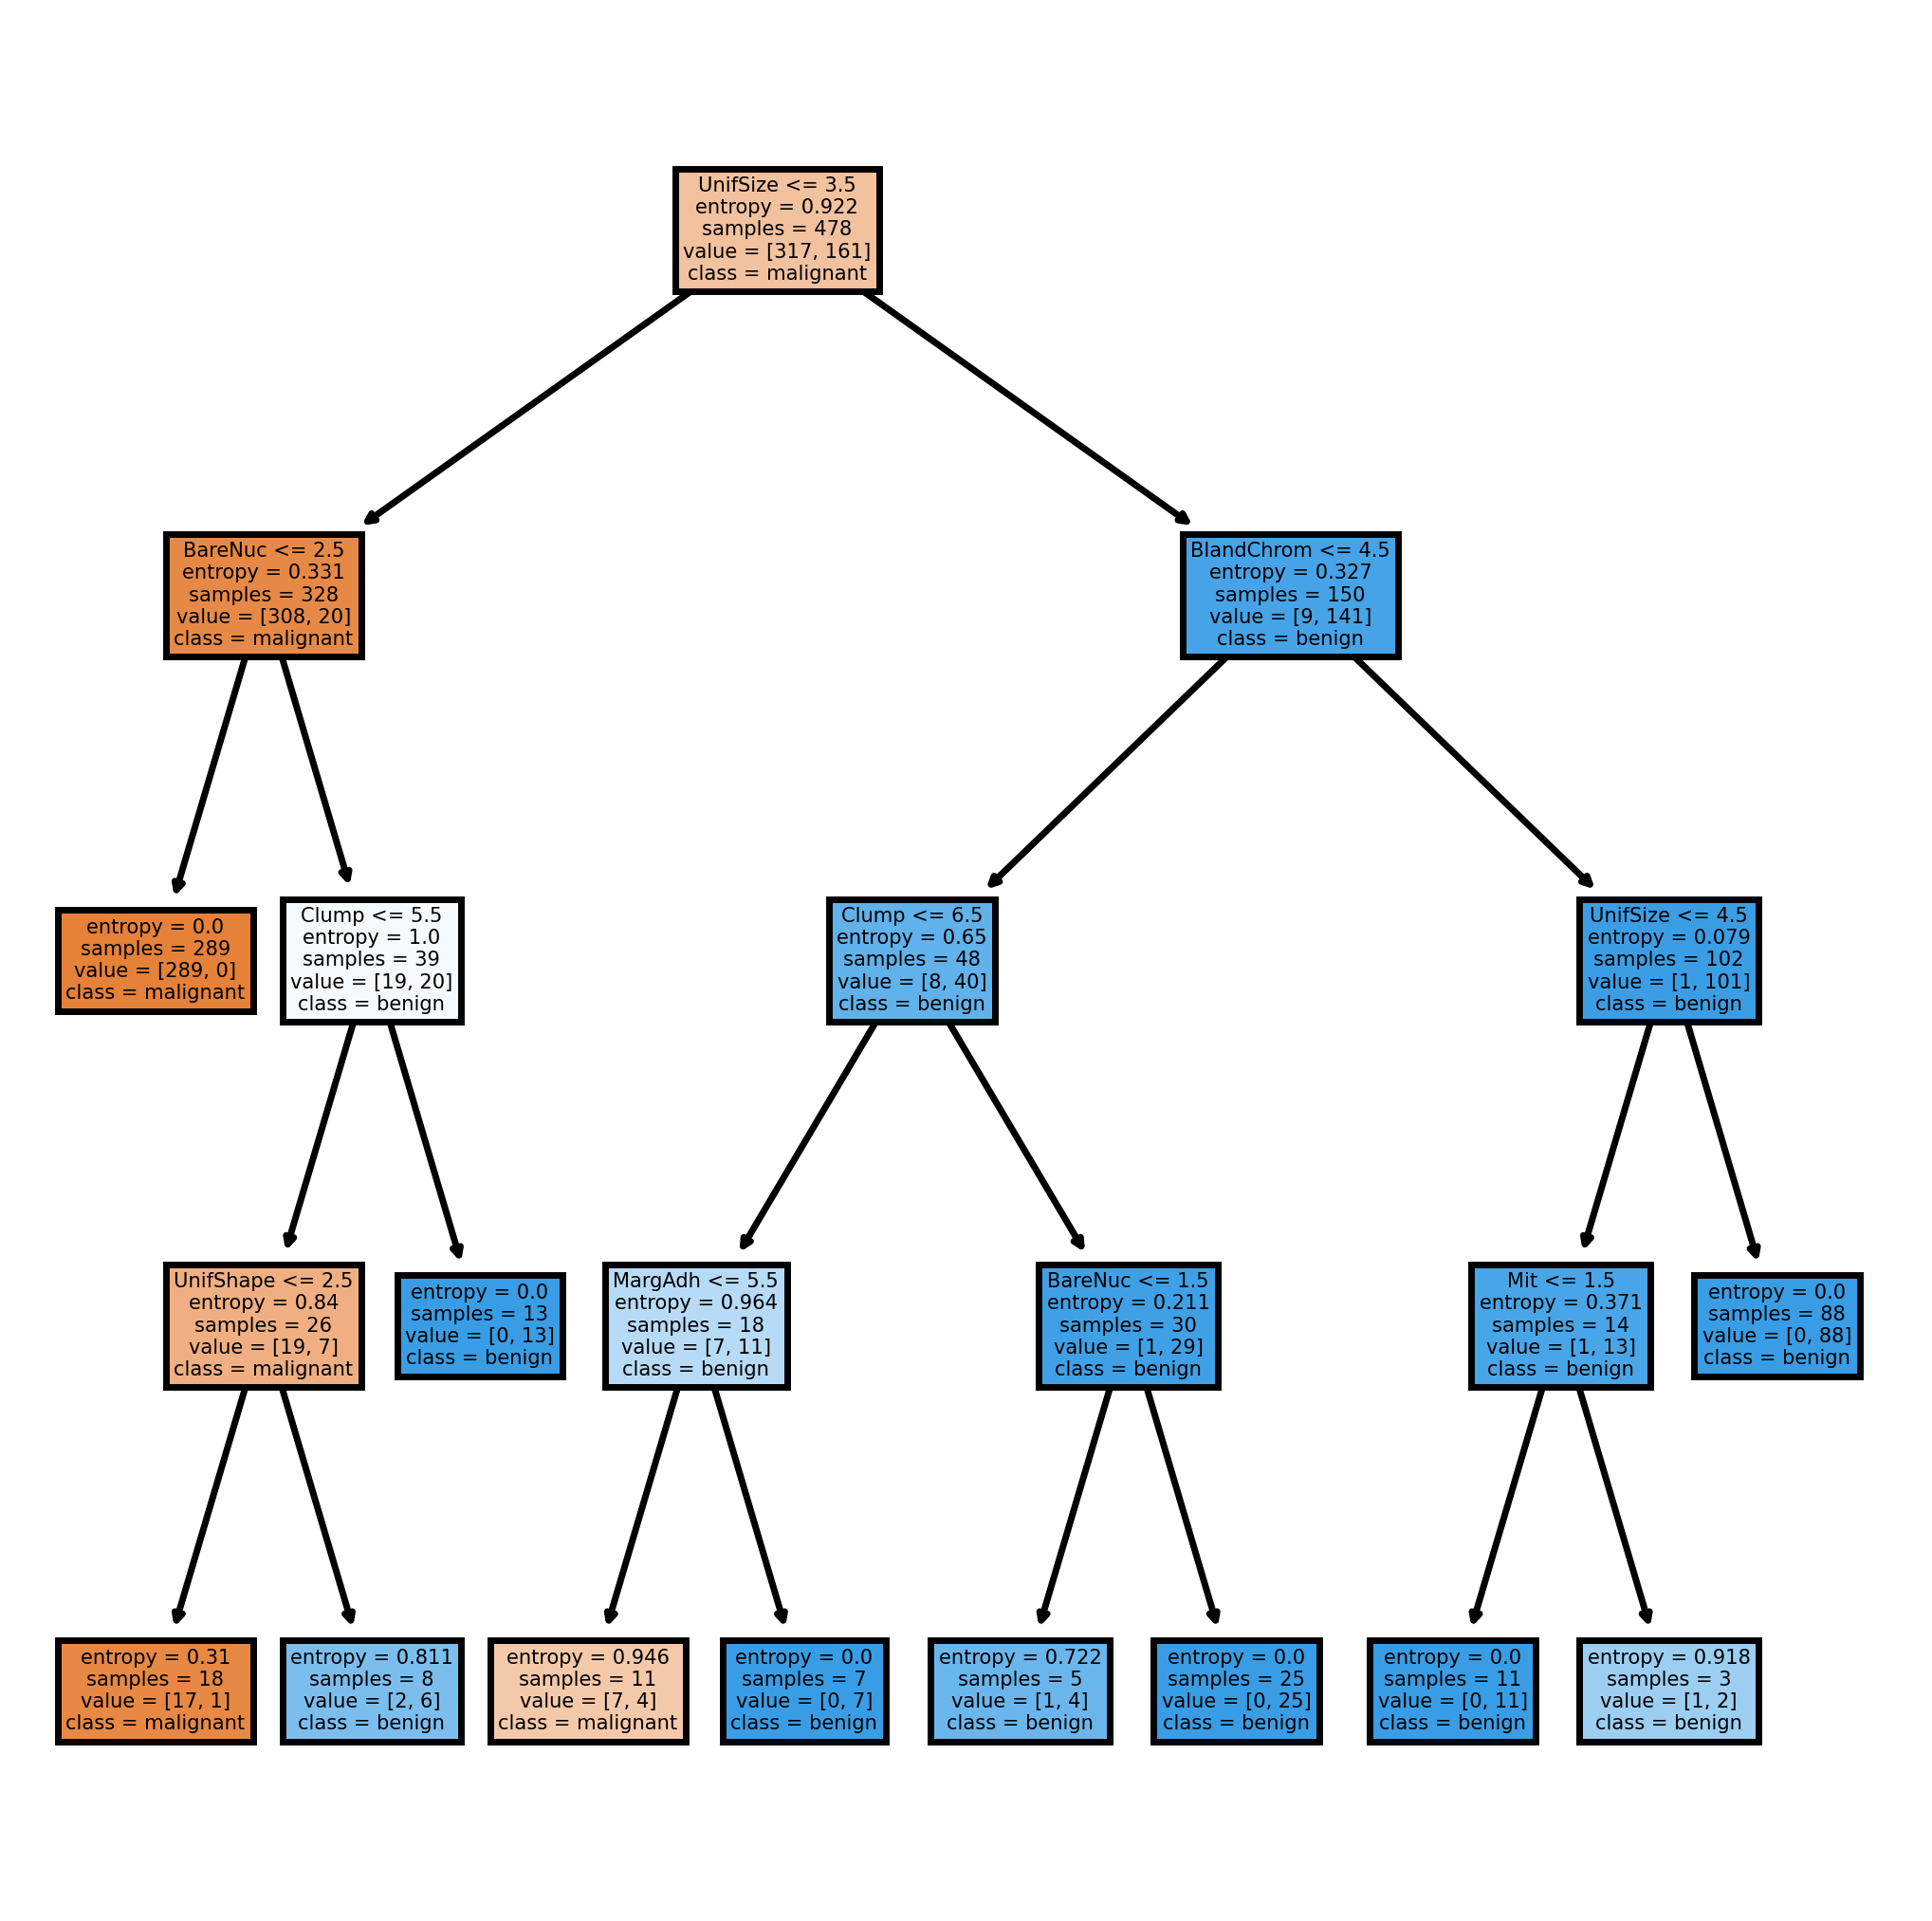

In [66]:
fn=['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
cn=['malignant', 'benign']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)
tree.plot_tree(model,feature_names = fn, class_names=cn, filled = True);